### Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.4/660.4 kB 18.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

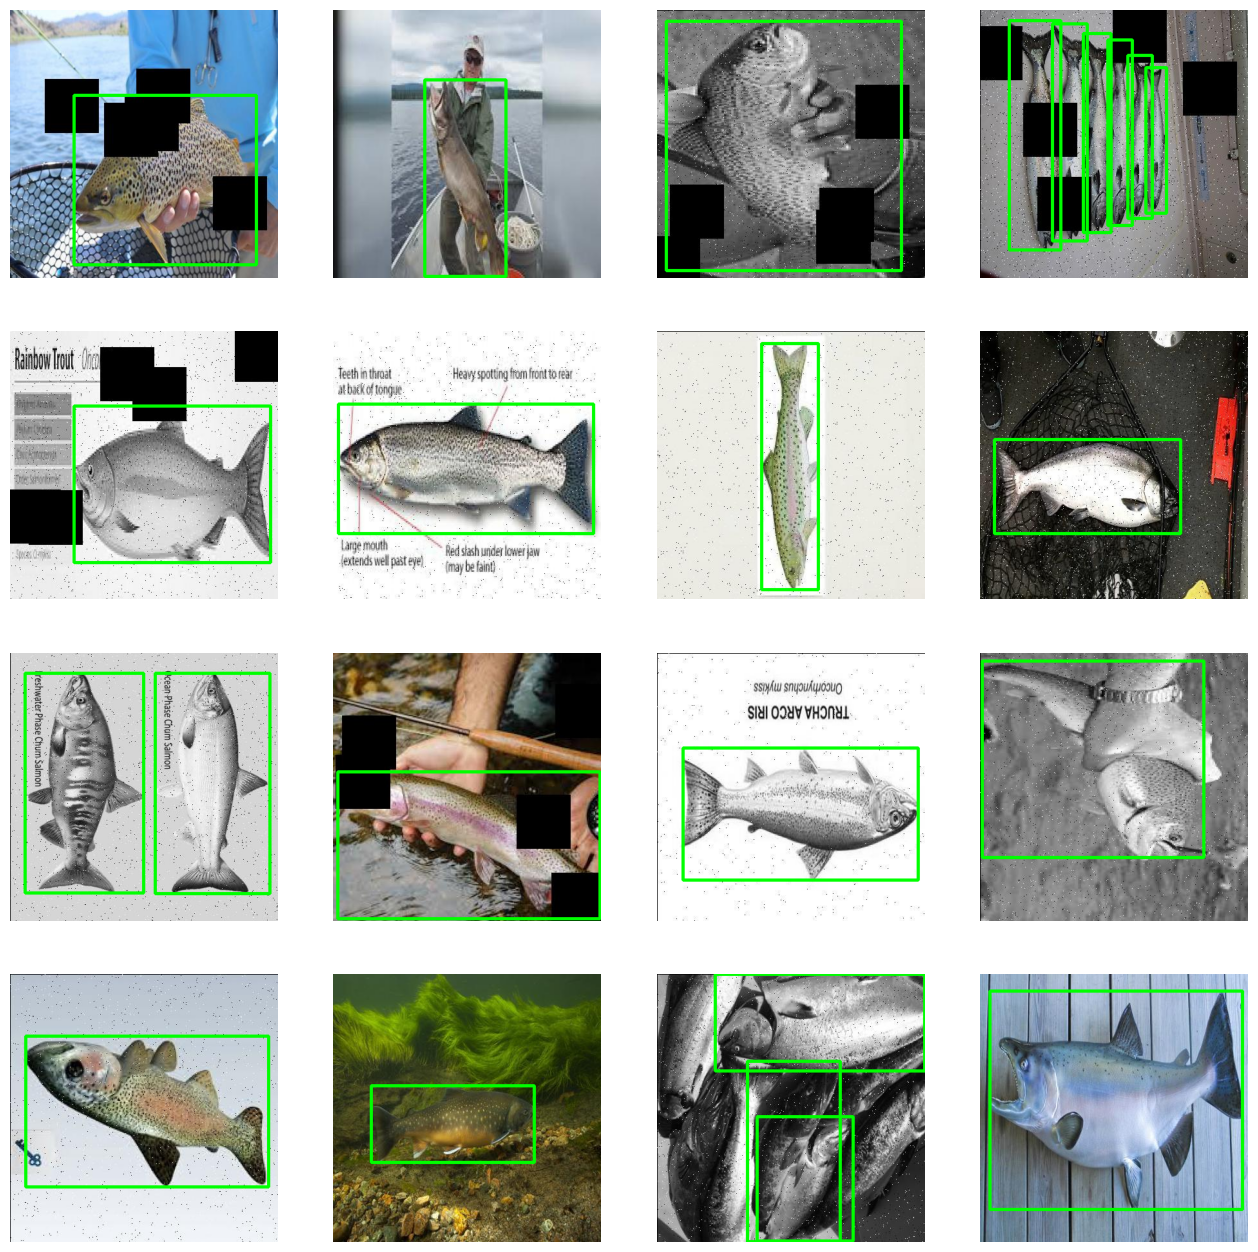

In [4]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/fish-detection/Fish Detection Dataset/train/images"
train_labels = "/kaggle/input/fish-detection/Fish Detection Dataset/train/labels"

test_images = "/kaggle/input/fish-detection/Fish Detection Dataset/test/images"
test_labels = "/kaggle/input/fish-detection/Fish Detection Dataset/test/labels"

val_images = "/kaggle/input/fish-detection/Fish Detection Dataset/valid/images"
val_labels = "/kaggle/input/fish-detection/Fish Detection Dataset/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [5]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/fish-detection/Fish Detection Dataset/test/images/-_86_jpeg.rf.4af8ec8d776d133eac91126020a1bb99.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 768x1024 and 3 channels.


In [6]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/input/fish-detection/Fish Detection Dataset/data.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

100%|██████████| 131M/131M [00:00<00:00, 281MB/s] 


Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/fish-detection/Fish Detection Dataset/data.yaml, epochs=20, patience=50, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/fish-detection/Fish Detection Dataset/train/labels... 2952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2952/2952 [00:10<00:00, 270.98it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/fish-detection/Fish Detection Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/fish-detection/Fish Detection Dataset/valid/labels... 434 images, 0 backgrounds, 0 corrupt: 100%|██████████| 434/434 [00:01<00:00, 249.64it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fish-detection/Fish Detection Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      15.5G       2.19      2.847      2.592         40       1024: 100%|██████████| 369/369 [10:57<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:30<00:00,  1.08s/it]

                   all        434        807    0.00644      0.289    0.00474    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      15.6G      2.261      2.981      2.663         70       1024: 100%|██████████| 369/369 [11:24<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.059       0.11      0.026    0.00479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      15.5G      2.107      2.804       2.54         49       1024: 100%|██████████| 369/369 [11:30<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807     0.0884        0.2      0.044     0.0119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      15.5G      2.022      2.681      2.456         20       1024: 100%|██████████| 369/369 [11:29<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.269      0.314      0.187     0.0566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      15.7G      1.972      2.573      2.398         48       1024: 100%|██████████| 369/369 [11:16<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.307       0.27      0.209     0.0599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      15.7G       1.91      2.483      2.358         24       1024: 100%|██████████| 369/369 [11:20<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807       0.41      0.368      0.307      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      15.7G      1.887       2.38      2.311         39       1024: 100%|██████████| 369/369 [11:17<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.485      0.414      0.366      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      15.7G       1.84        2.3      2.272         39       1024: 100%|██████████| 369/369 [11:20<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807       0.51       0.42      0.395      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      15.7G      1.798      2.258      2.235         30       1024: 100%|██████████| 369/369 [11:16<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.551       0.42       0.41      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      15.7G      1.768      2.176      2.204         16       1024: 100%|██████████| 369/369 [11:14<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.05s/it]

                   all        434        807      0.579      0.445      0.461      0.185


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      15.8G      1.944       2.08      2.454         28       1024: 100%|██████████| 369/369 [11:07<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.655      0.475      0.494      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      15.5G      1.889      1.946      2.427         10       1024: 100%|██████████| 369/369 [11:22<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.611      0.502      0.534       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      15.7G      1.849      1.788      2.384          8       1024: 100%|██████████| 369/369 [11:17<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.605      0.492      0.523      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      15.4G      1.802      1.747      2.321          8       1024: 100%|██████████| 369/369 [11:35<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]

                   all        434        807      0.702      0.529      0.572      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      15.5G      1.757      1.692        2.3         12       1024: 100%|██████████| 369/369 [11:31<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.696      0.492      0.557      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      15.7G      1.711      1.599      2.222         12       1024: 100%|██████████| 369/369 [11:13<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.737      0.535      0.628      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      15.7G      1.694      1.549      2.218         10       1024: 100%|██████████| 369/369 [11:12<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807        0.7       0.58      0.644      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      15.7G      1.633      1.487       2.15         12       1024: 100%|██████████| 369/369 [11:13<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.05s/it]


                   all        434        807      0.777      0.535      0.636      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      15.8G      1.608      1.459      2.113         14       1024: 100%|██████████| 369/369 [11:06<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


                   all        434        807      0.787      0.569      0.676      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      15.6G      1.552      1.396      2.058         10       1024: 100%|██████████| 369/369 [11:21<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]

                   all        434        807      0.824       0.56      0.695      0.375



20 epochs completed in 3.963 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]


                   all        434        807      0.821       0.56      0.695      0.375
Speed: 1.1ms preprocess, 63.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b162bf4e200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

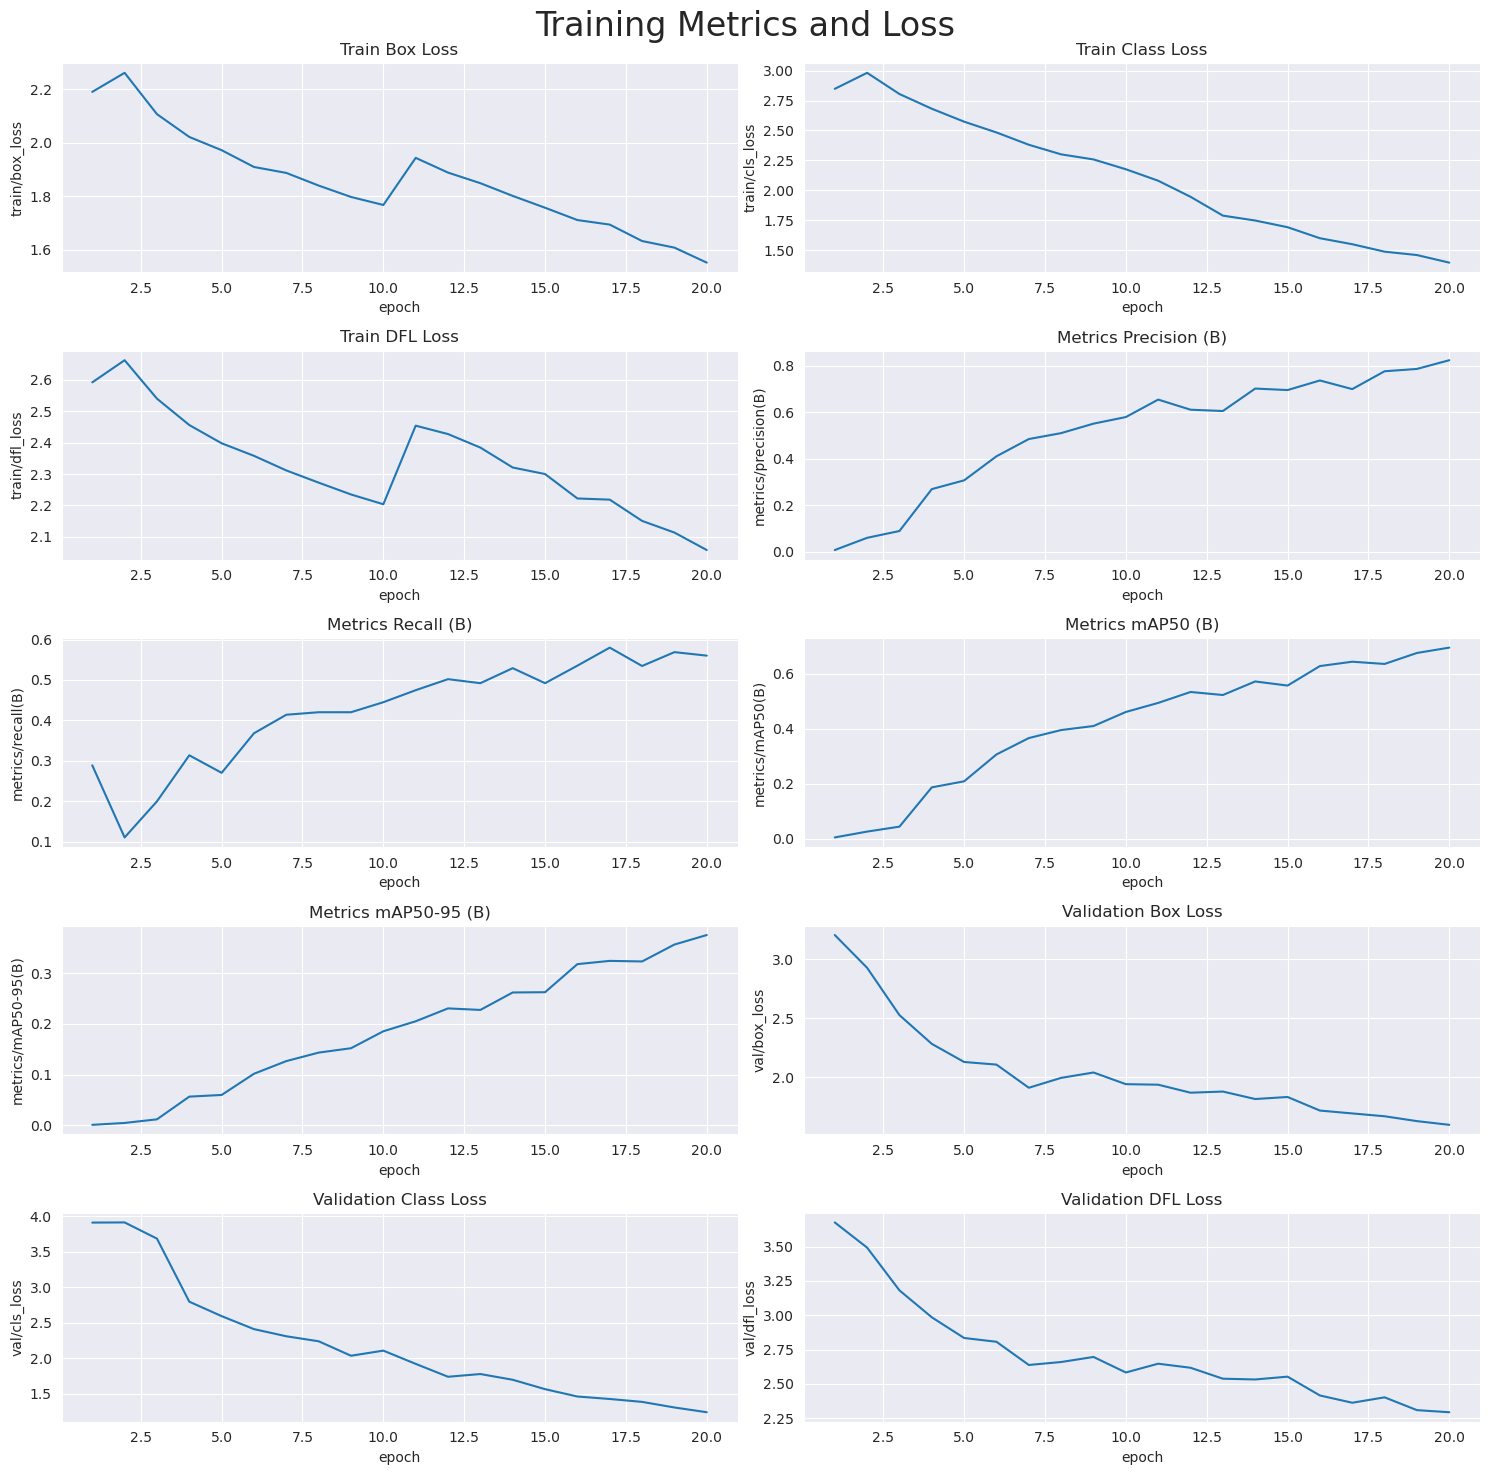

In [7]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


In [8]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/input/fish-detection/Fish Detection Dataset/test/labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 246.77it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fish-detection/Fish Detection Dataset/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.23s/it]


                   all        223        400      0.772      0.609      0.737      0.434
Speed: 2.9ms preprocess, 64.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val


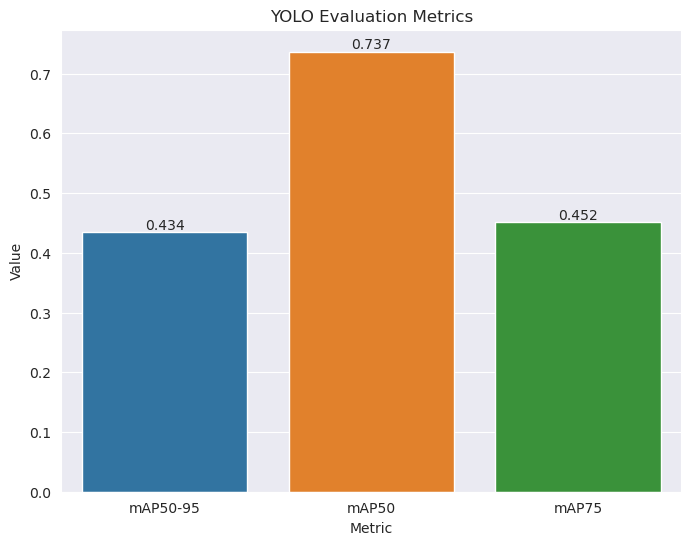

In [9]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

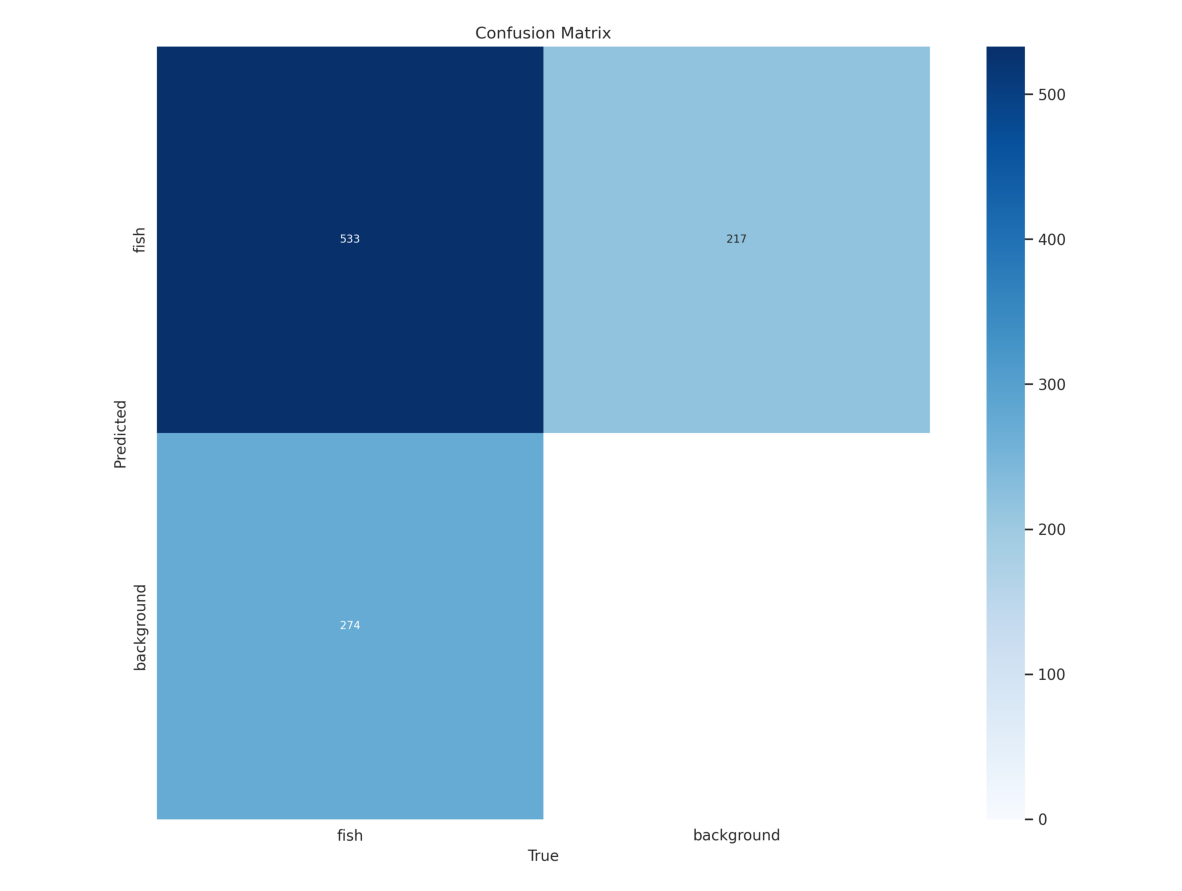

In [10]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [11]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 1024x1024 (no detections), 74.9ms
Speed: 9.6ms preprocess, 74.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 768x1024 (no detections), 72.8ms
Speed: 4.2ms preprocess, 72.8ms inference, 1.0ms postprocess per image at shape (1, 3, 768, 1024)

0: 1024x1024 1 fish, 69.9ms
Speed: 6.8ms preprocess, 69.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 fish, 69.6ms
Speed: 5.1ms preprocess, 69.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 fish, 68.9ms
Speed: 5.1ms preprocess, 68.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 2 fishs, 68.9ms
Speed: 6.1ms preprocess, 68.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 2 fishs, 69.0ms
Speed: 5.1ms preprocess, 69.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 fish, 69.0ms
Speed: 4.3ms preprocess, 69.0ms inference, 1.5ms postproc

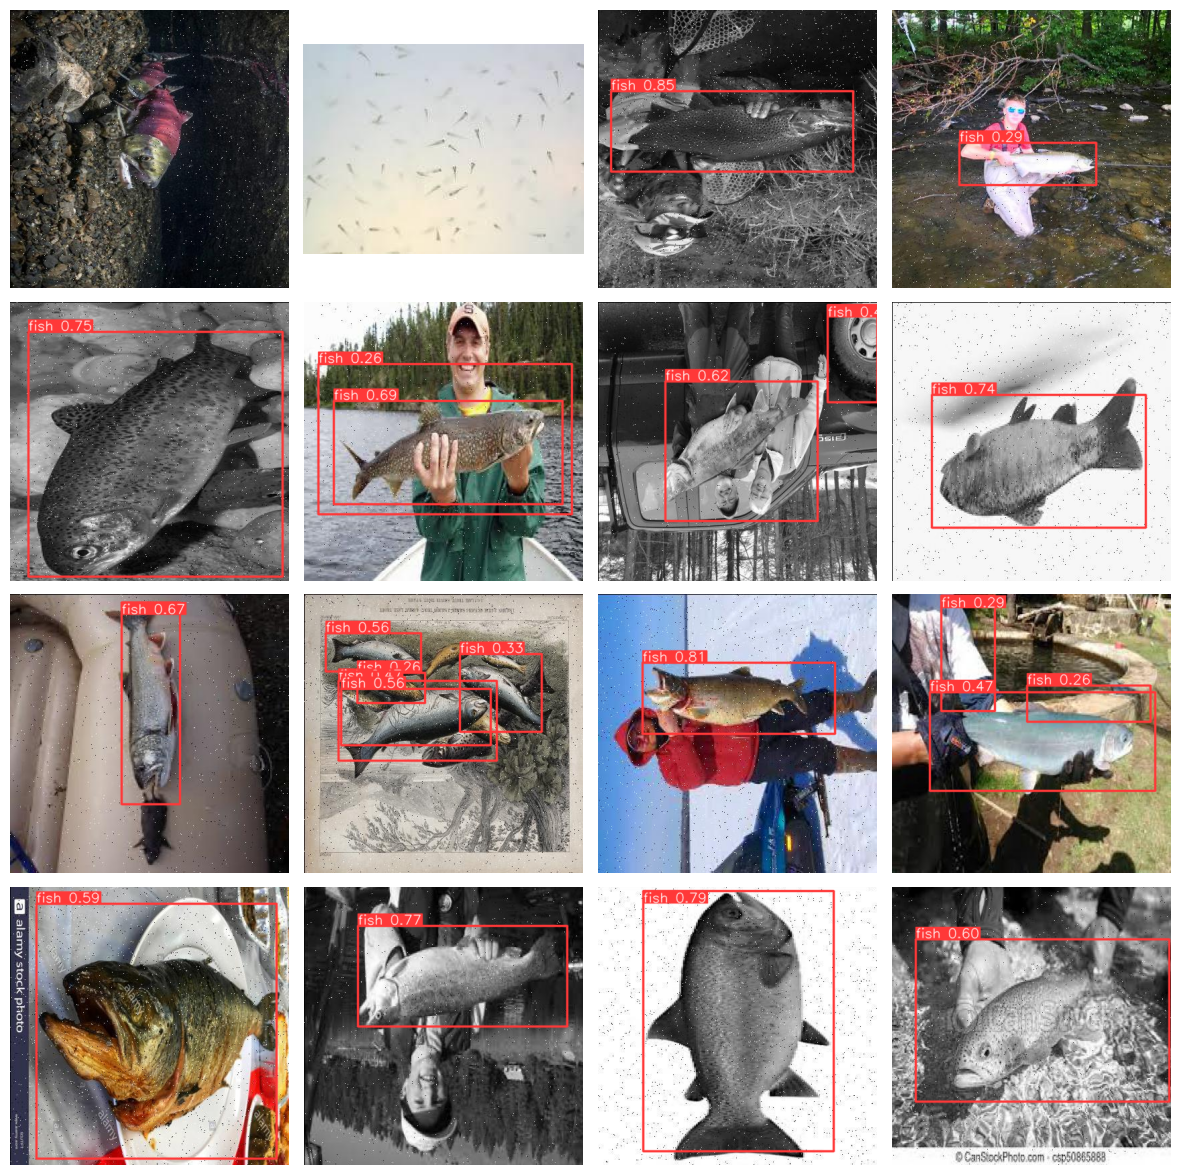

In [12]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/fish-detection/Fish Detection Dataset/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)